In [211]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from statsmodels.graphics.mosaicplot import mosaic

Reading the CSV file and loading the data into Dataframe

In [212]:
#importing data file and adding default dtype as there were some discepancies in data types in the file while importing.

loanDF = pd.read_csv("loan.csv", dtype='unicode')

#Setting default column to be displayed as to see all columns 
pd.set_option('max_columns',120)
pd.set_option('max_colwidth',100)

<h1> Understanding Data </h1>

In [213]:
#Getting basic Idea about the data rows and columns
loanDF.shape

(39717, 111)

In [214]:
#Here we can see all 111 colums are of "object" data type.
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [215]:
loanDF.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,1046604,1061366,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=890277,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


In [216]:
#Checking for Duplicate Rows
print("Dulpicate rows present in the data frame:" ,
      loanDF.duplicated(subset=None, keep='first').count() != loanDF.shape[0])

Dulpicate rows present in the data frame: False


<h4>Checking for the coulums with null value</h4>

In [217]:
#checking if there are any columns with all null values
loanDF.isnull().all(axis=0).sum()

54

In [218]:
loanDF.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<h2> Data Cleaning</h2>

<h3>Removing unnecessary columns</h3>

<h4>Removing columns with null values and columns with the same values through out all the records</h4>

In [219]:
#Cleaning : dropping columns having all null values
loanDF = loanDF.dropna(how='all', axis = "columns")
loanDF.shape

(39717, 57)

In [220]:
#keeping only rows having at least half of the data non NA
loanDF.dropna(how=any,axis='columns',thresh=len(loanDF)/2,inplace=True)
loanDF.shape

(39717, 54)

In [221]:
allColumns = list(loanDF.columns)

In [222]:
#removing all those coumns with only single values for all the rows
columnsWithSingleValue = []
for column in allColumns:
    length = len(loanDF[column].value_counts())
    if length <= 1:
        columnsWithSingleValue.append(column)
loanDF = loanDF.drop(columnsWithSingleValue, axis = 1)
loanDF.shape

(39717, 45)

In [223]:
print(loanDF.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


Removing further unnecessary columns

In [224]:
# Columns like 'funded_amnt', 'funded_amnt_inv' as 'loan_amt' would represent similar thing
# Columns like member_id, url are just unique representation of the record, and for that we already have 'id' coulms
# Columns like desc, title, emp_title, last_paymnt_d, last_paymnt_amnt have values that are not influencing loan_status
# Columns recoveries, collection_recovery_fee are specific to Charged Off loan 
#         and thus won't help us in alazying Fully Paid vs Charged Off

# Removing Customer Behaviour columns (as this information won't be available when applying the loan so not useful for our analysis)
# 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
#'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',

unnecessaryColumns = ['member_id', 'funded_amnt', 'funded_amnt_inv', 'url', 'desc', 'title','zip_code', 
                      'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
                      'out_prncp', 'out_prncp_inv', 'total_pymnt',
                       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',  
                     'emp_title', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
loanDF = loanDF.drop(unnecessaryColumns, axis = 1)
loanDF.shape

(39717, 22)

<h3> Remove Unnecessary Records </h3>


In [225]:
#Dropping all records with "Current" status for loan_status column. Because we are intested in comaparison b/w default and Fully Paid
#While Current can fall into any of them so cannot be sure about the future of 'Current' as of now
loanDF = loanDF[loanDF.loan_status != "Current"]

In [226]:
#Dropping the rows where revol_util value of revol_util is null because we needed all its values to be numeric for our analysis
loanDF = loanDF[loanDF.revol_util == loanDF.revol_util]

<h3>standardizing values of intereset rate and revol utilization</h3>

In [227]:
loanDF.int_rate = loanDF.int_rate.apply(lambda x: float(x.replace("%", "")))
loanDF.revol_util = loanDF.revol_util.apply(lambda x: x if (x!=x) else x.replace("%", ""))

<h4>Imputing the value "Not known" in the place of null data as imputing with median would not give correct picture of actuals.</h4>

In [228]:
loanDF.emp_length.fillna("Not Known", inplace = True)
loanDF.pub_rec_bankruptcies.fillna("Not Known", inplace = True)

<h4>Setting proper data type for numeric type columns</h4>

In [229]:
numericColumns = ['loan_amnt','installment','annual_inc','dti', 
                  'revol_bal', 'revol_util', 'open_acc', 'total_acc']
loanDF[numericColumns] = loanDF[numericColumns].apply(pd.to_numeric)

<h4>Deriving "Year" "MOnth" Columns from "Issue Date" column</h4>

In [230]:
loanDF['issue_d']=pd.to_datetime(loanDF.issue_d,format='%b-%y')
loanDF['Year']=loanDF['issue_d'].dt.year
loanDF['Month']=loanDF['issue_d'].dt.month

<h2>Analysing Data</h2>


<h3>Outliers</h3>

In [231]:
def plotBoxPlotForAmountVariables():
    plt.figure(figsize=(20, 12))
    plt.subplot(2,2,1)
    sns.boxplot(y = 'loan_amnt', data = loanDF)
    plt.subplot(2,2,2)
    sns.boxplot(y = 'annual_inc', data = loanDF)
    plt.subplot(2,2,3)
    sns.boxplot(y = 'revol_bal', data = loanDF)
    plt.subplot(2,2,4)
    sns.boxplot(y = 'installment', data = loanDF)
    plt.show() 

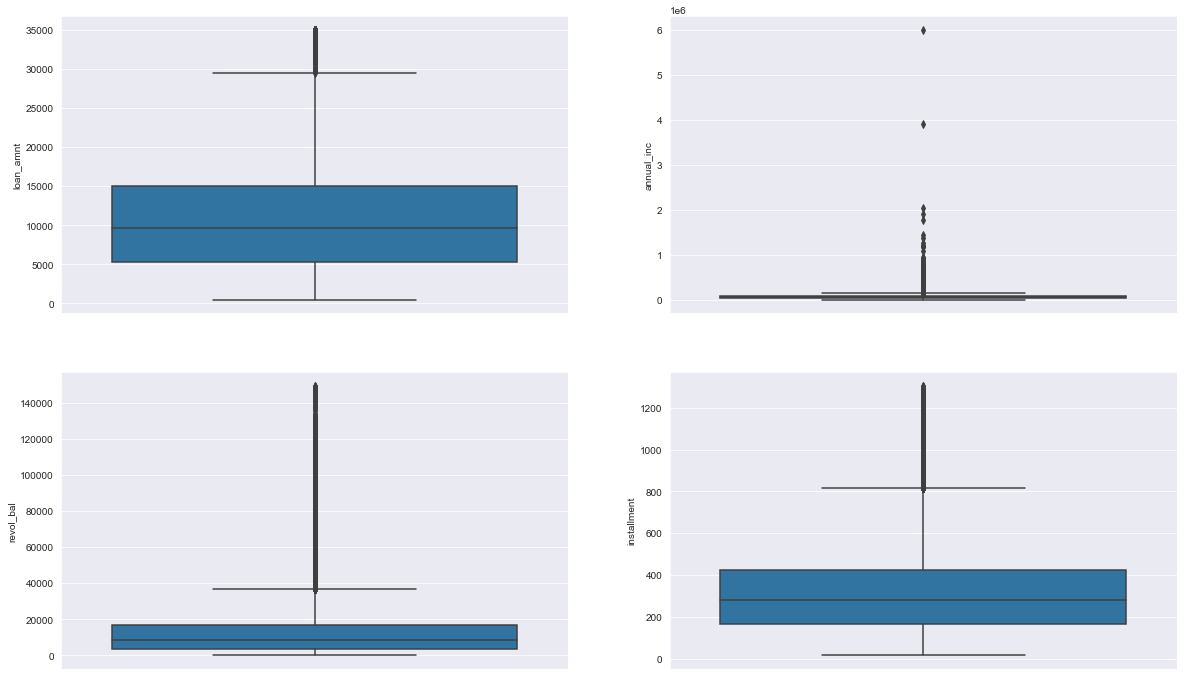

In [232]:
#Checking for the distribution of data for the columns containg amounts
plotBoxPlotForAmountVariables()

from above box plots, it is clear that outliers are present in the data for this varaibles.
lets remove records with data above 98th percentile

<h4>Removing outliers.</h4>

In [233]:
nintyEighthPer = loanDF.annual_inc.quantile(.98)
loanDF = loanDF[loanDF.annual_inc <= nintyEighthPer]

nintyEighthPer = loanDF.loan_amnt.quantile(.98)
loanDF = loanDF[loanDF.loan_amnt <= nintyEighthPer]

nintyEighthPer = loanDF.revol_bal.quantile(.98)
loanDF = loanDF[loanDF.revol_bal <= nintyEighthPer]

nintyEighthPer = loanDF.installment.quantile(.98)
loanDF = loanDF[loanDF.installment <= nintyEighthPer]

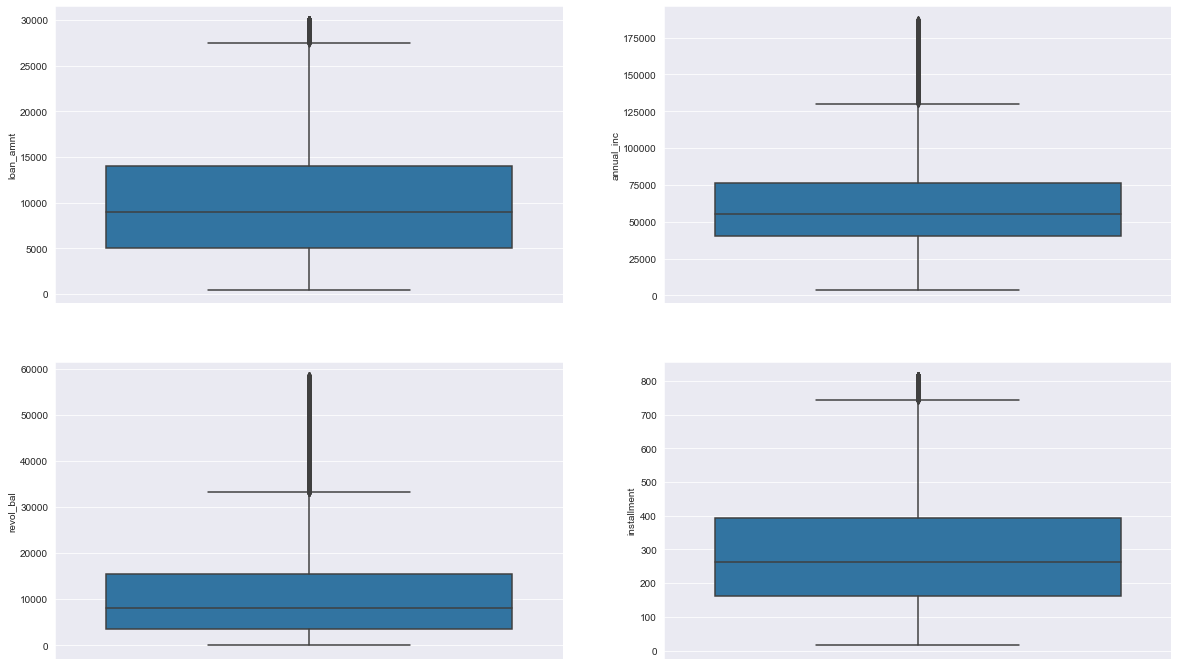

In [234]:
#After Removing the out-liers, again checking for distribution of data.
plotBoxPlotForAmountVariables()


<h3>Ploting Histogram to check overall distribution</h3>
<h5>These Histogram plots suggest general distribution of loan data. But will not give us causative factors for 'Default' </h5>

In [235]:
#Plotting bar plot by count of data

def plotBarPlotForVar(dataFrame, variable, width = 10, height = 5):
    tempData = dataFrame[variable].value_counts().reset_index()
    plt.figure(figsize=(width, height))
    dataFrame[variable].value_counts().plot.bar()
    plt.xlabel(variable)

    plt.show()


In [236]:
def plotHistPlotForVar(dataFrame, variable, hueVar = 'loan_status', width = 10, height = 5):
    plt.figure(figsize=(width, height))
    sns.histplot(data=dataFrame.sort_values([variable], ascending = True), 
                     x=variable, hue=hueVar)
    plt.show()
    

In [237]:
def printValueCountForVariable(dataframe, variable):
    print(dataframe[variable].value_counts())

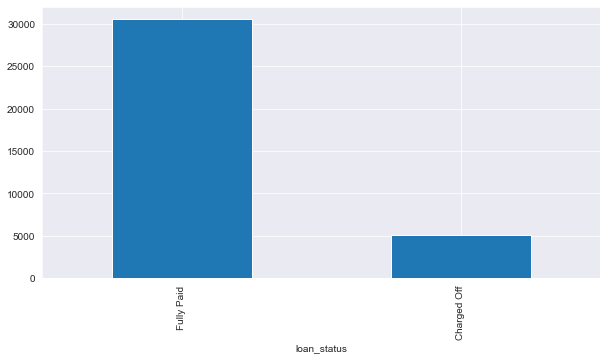

In [238]:
plotBarPlotForVar(loanDF, 'loan_status')

B    10917
A     9605
C     7298
D     4535
E     2293
F      786
G      214
Name: grade, dtype: int64


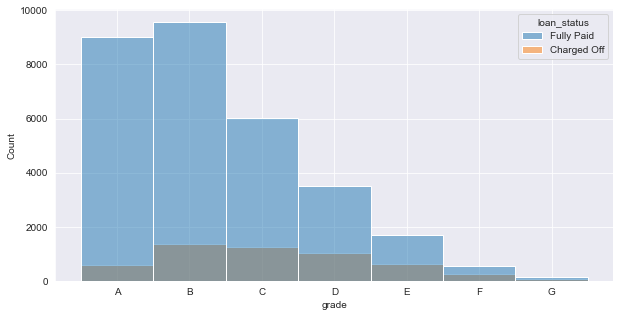

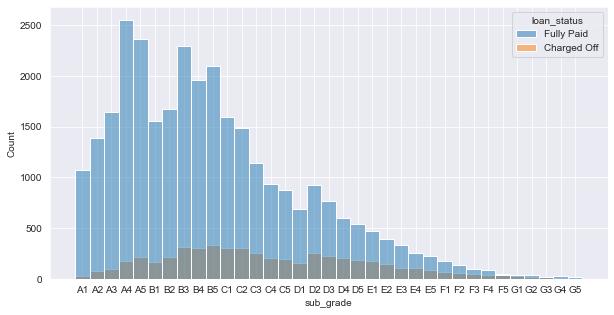

In [239]:
printValueCountForVariable(loanDF, 'grade')
plotHistPlotForVar(loanDF, 'grade', 'loan_status')
plotHistPlotForVar(loanDF, 'sub_grade', 'loan_status')

10+ years    7482
< 1 year     4249
2 years      4017
3 years      3787
4 years      3113
1 year       3001
5 years      2980
6 years      2013
7 years      1592
8 years      1305
9 years      1127
Not Known     982
Name: emp_length, dtype: int64


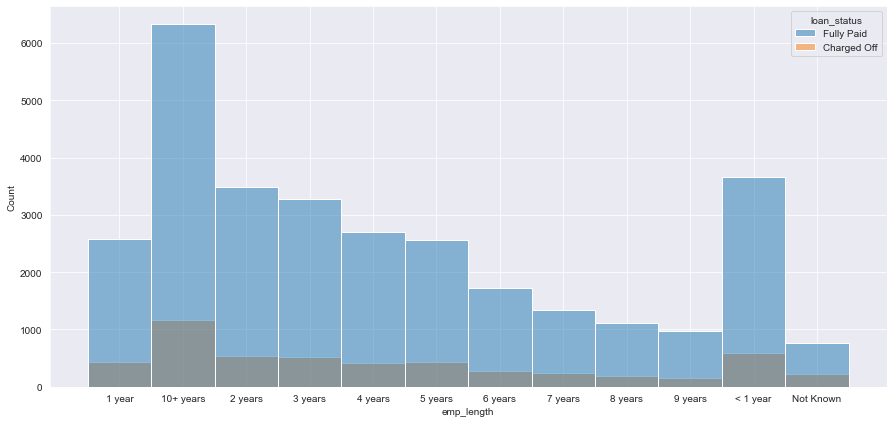

In [240]:
printValueCountForVariable(loanDF, 'emp_length')
plotHistPlotForVar(loanDF, 'emp_length', 'loan_status', 15, 7)

 36 months    27075
 60 months     8573
Name: term, dtype: int64


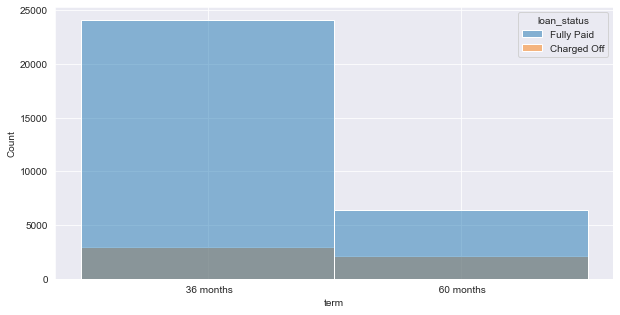

In [241]:
printValueCountForVariable(loanDF, 'term')
plotHistPlotForVar(loanDF,'term')

debt_consolidation    16650
credit_card            4636
other                  3642
home_improvement       2555
major_purchase         2044
small_business         1495
car                    1446
wedding                 880
medical                 644
moving                  555
vacation                368
house                   333
educational             305
renewable_energy         95
Name: purpose, dtype: int64


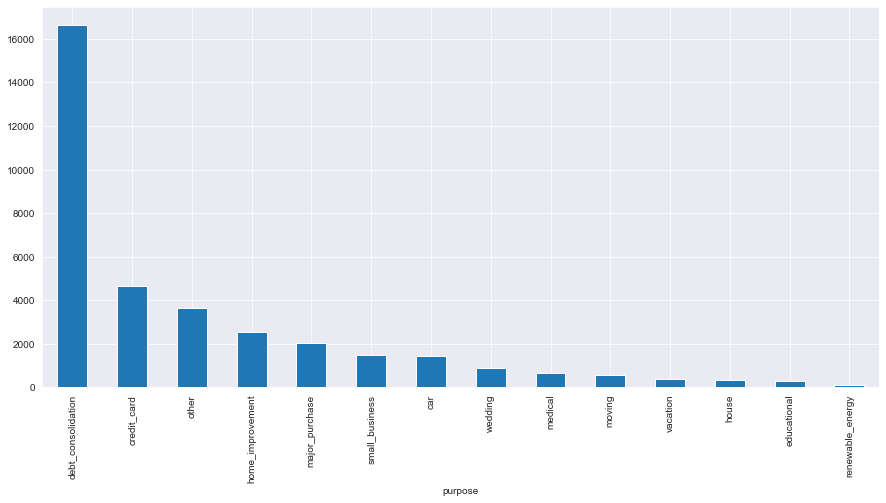

In [242]:
printValueCountForVariable(loanDF, 'purpose')
plotBarPlotForVar(loanDF,'purpose' , 15, 7)

2011    18799
2010    10800
2009     4361
2008     1460
2007      228
Name: Year, dtype: int64


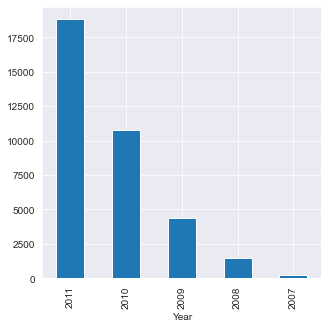

In [243]:
printValueCountForVariable(loanDF, 'Year')
plotBarPlotForVar(loanDF,'Year' , 5, 5)

12    3916
11    3676
10    3404
9     3222
8     3134
7     3118
6     2955
5     2725
4     2620
3     2489
1     2197
2     2192
Name: Month, dtype: int64


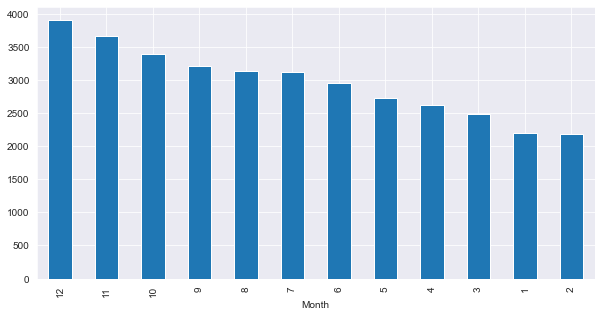

In [244]:
printValueCountForVariable(loanDF, 'Month')
plotBarPlotForVar(loanDF,'Month' , 10, 5)

RENT        17749
MORTGAGE    15008
OWN          2798
OTHER          90
NONE            3
Name: home_ownership, dtype: int64


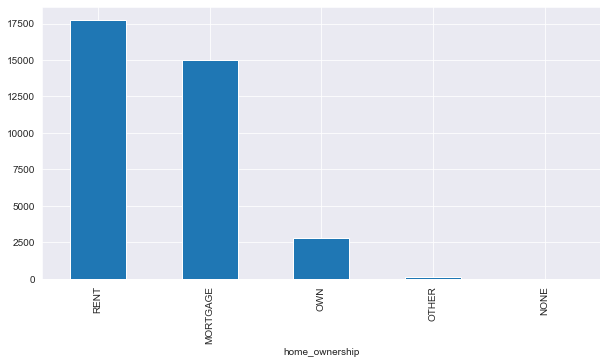

In [245]:
printValueCountForVariable(loanDF, 'home_ownership')
plotBarPlotForVar(loanDF,'home_ownership' , 10, 5)

<h3>Binning the Numeric Variables</h3>

In [246]:
usefulNumericVars = ['loan_amnt','int_rate', 'annual_inc', 'dti', 'revol_util' ]
binnedNumericVars = list(map(lambda x: x+ "_intervals", usefulNumericVars)) 

In [247]:
loanDF.int_rate.describe()

count    35648.000000
mean        11.789891
std          3.628294
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         24.400000
Name: int_rate, dtype: float64

In [248]:
loanDF['int_rate_intervals']=pd.cut(loanDF.int_rate,[5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5,25], 
                             labels= ['5-7.5','7.5-10','10-12.5','12.5-15','15-17.5','17.5-20','20-22.5','22.5+'],
                            include_lowest=True)

In [249]:
loanDF.annual_inc.describe()

count     35648.000000
mean      61442.249534
std       30446.228956
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       76164.000000
max      187000.000000
Name: annual_inc, dtype: float64

In [250]:
loanDF['annual_inc_intervals']=pd.cut(loanDF.annual_inc,[0,10000,25000,50000,75000,100000,125000,150000,200000],
                              labels=['0-10k','10k-25k','25k-50k','50k-75k','75k-100k','100k-125k','125k-150k',
                                      '150+'])

In [251]:
loanDF.dti.describe()

count    35648.000000
mean        13.294871
std          6.671426
min          0.000000
25%          8.150000
50%         13.380000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [252]:
loanDF['dti_intervals']=pd.cut(loanDF.dti,[0, 5, 10, 15, 20, 35],labels=['0-5', '5-10', '10-15', '15-20', '20+'],include_lowest=True)

In [253]:
loanDF.loan_amnt.describe()

count    35648.000000
mean     10099.112853
std       6197.389647
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      30000.000000
Name: loan_amnt, dtype: float64

In [254]:
loanDF['loan_amnt_intervals']=pd.cut(loanDF.loan_amnt,[0,2500,5000,10000,15000,20000,25000,30001],
                           labels=['0-2.5K','2.5K-5K','5K-10K','10K-15K','15K-20K','20K-25K',
                                  '25K+'])

In [255]:
loanDF.revol_util.describe()

count    35648.000000
mean        48.326291
std         28.308297
min          0.000000
25%         24.900000
50%         48.600000
75%         71.800000
max         99.900000
Name: revol_util, dtype: float64

In [256]:
loanDF['revol_util_intervals']=pd.cut(loanDF.revol_util,[0,20,40,60,80,100],
                           labels=['0-20','20-40','40-60','60-80','80+'] ,include_lowest=True)

In [257]:
loanDF.total_acc.describe()

count    35648.000000
mean        21.505919
std         11.226020
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [258]:
loanDF['total_acc_intervals']=pd.cut(loanDF.total_acc,[0,20,40,60,80,100],
                           labels=['0-20','20-40','40-60','60-80','80+'])

In [259]:
loanDF.open_acc.describe()

count    35648.000000
mean         9.124860
std          4.340829
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         42.000000
Name: open_acc, dtype: float64

In [260]:
loanDF['open_acc_intervals']=pd.cut(loanDF.open_acc,[0,10,20,30,40,50],
                           labels=['0-10','10-20','20-30','30-40','40+'])

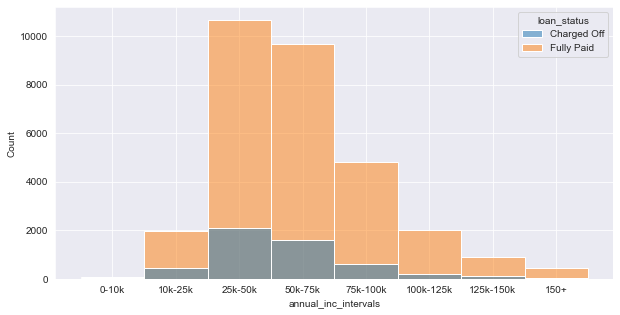

In [261]:
plotHistPlotForVar(loanDF,'annual_inc_intervals')

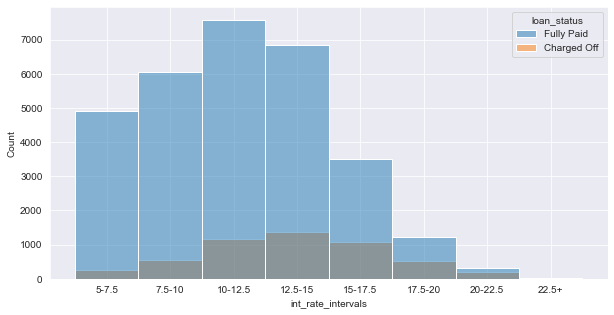

In [262]:
plotHistPlotForVar(loanDF,'int_rate_intervals')


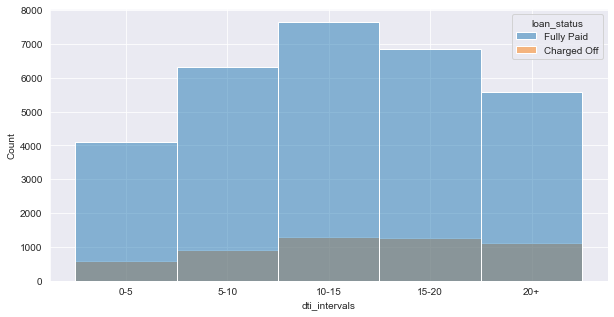

In [263]:
plotHistPlotForVar(loanDF,'dti_intervals')

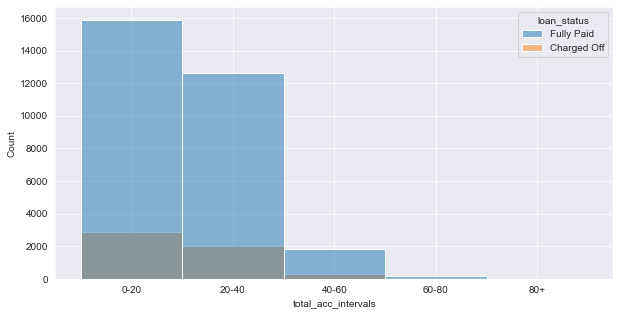

In [264]:
plotHistPlotForVar(loanDF,'total_acc_intervals')

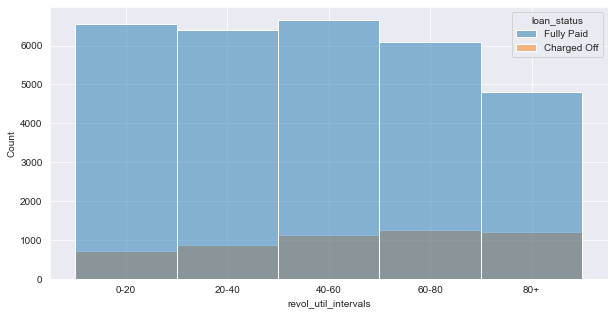

In [265]:
plotHistPlotForVar(loanDF,'revol_util_intervals')

<h3>General Correlation of different variables</h3>

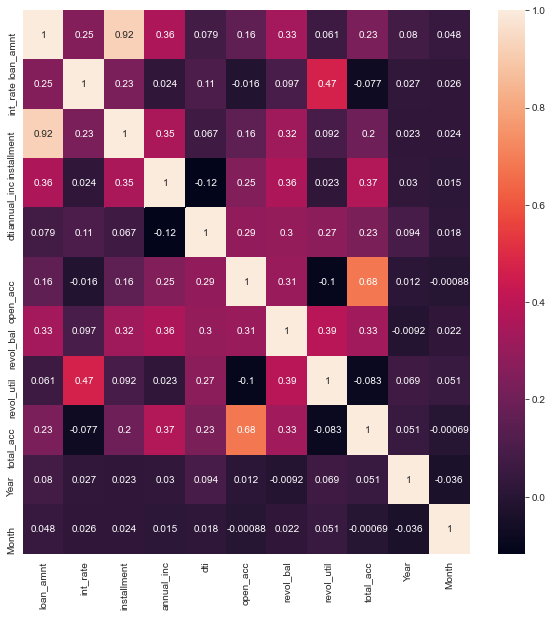

In [266]:
plt.figure(figsize=(10, 10))
corrMatrix = loanDF.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

From above correlation matrix, we can see that apart from 'loan amonunt' and 'intallment' no other variables are strongly related to each other.

However, we can see an average relation between 'Total accounts' and 'Open accounts'

<i>Please Note, this matrix doesn't indicate relation of variables with target variables</i>

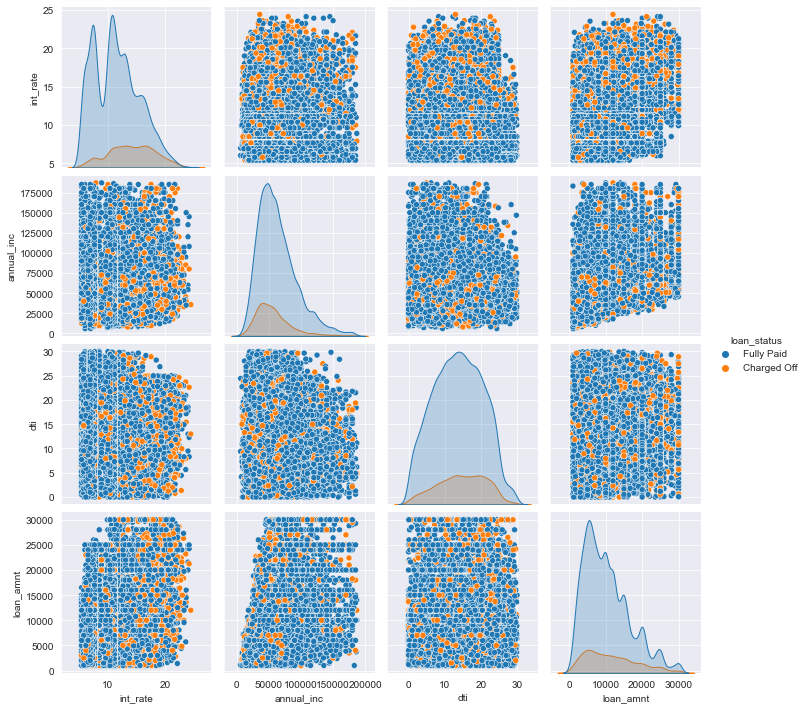

In [267]:
sns.pairplot(loanDF[loanDF.Year==2011][['int_rate','annual_inc','dti','loan_amnt','loan_status']],diag_kind='kde',hue = 'loan_status')
plt.show()

From above pair plot, we can't see that any solid trend of how one variable is influencing other variable,

but we can rought see the tendancy of 'Charged off' with respect to values of different variable.

e.g. we can see more charged-off when int_rate is higher.

<h4>Distribution of Numeric Variables for different Categories</h4>

lets check if we can find any pattern in distribution of numeric variables being influenced by different categories of other variables

In [268]:
def plotBoxPlotForNumericVarVsCategoricalVar(var1, var2, width, height):
    plt.figure(figsize=(width,height))
    sns.boxplot(x=var1, y=var2,data =loanDF, palette = 'mako')


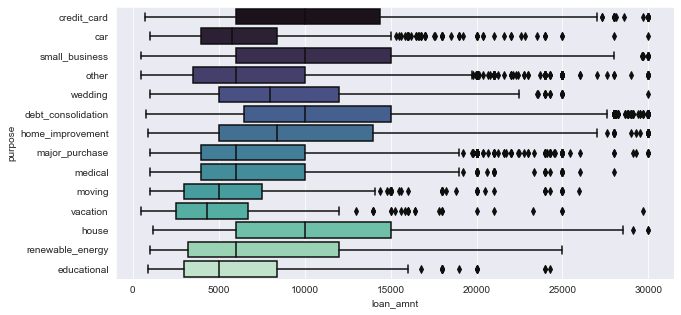

In [269]:
plotBoxPlotForNumericVarVsCategoricalVar('loan_amnt', 'purpose', 10, 5)

#Loan amount is greater for small business, house and debt consolidation purposes

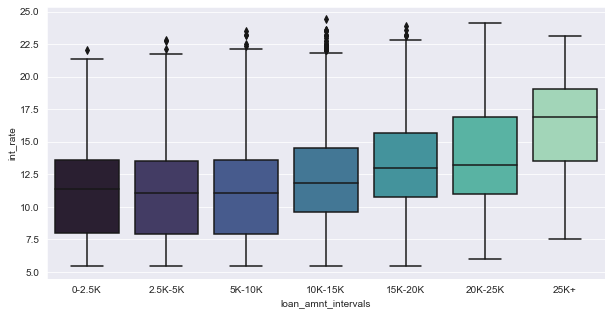

In [270]:
plotBoxPlotForNumericVarVsCategoricalVar('loan_amnt_intervals', 'int_rate', 10, 5)

#There seems to be trend as loan amount is increasing, interest rate also seems to be increasing

In above box-plots, we can see for loan amount higher than 10K, interest rate is increasing with the loan amount

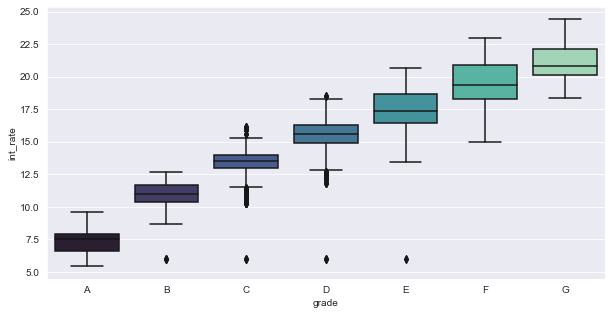

In [271]:
plotBoxPlotForNumericVarVsCategoricalVar(loanDF.grade.sort_values(ascending=True), 'int_rate', 10, 5)
#There seems to be trend as grades from A-G, interest rate also seems to be increasing

We can clearly see a trend here, Interest rate is directly related with Grade of loans.

This can imply that agency is deciding the interest rate based on the grade in which the application is falling

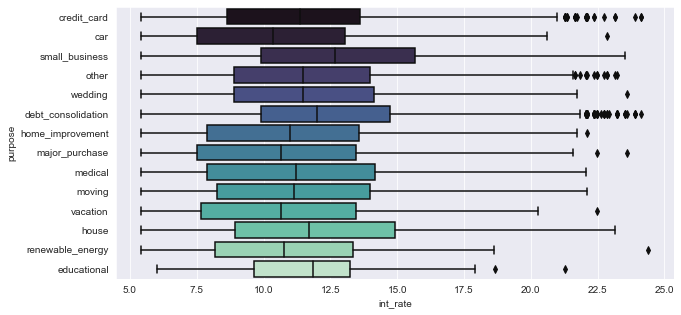

In [272]:
plotBoxPlotForNumericVarVsCategoricalVar('int_rate', 'purpose', 10, 5)

#For small business, house and debt consolidation purposes, interest rates are higher

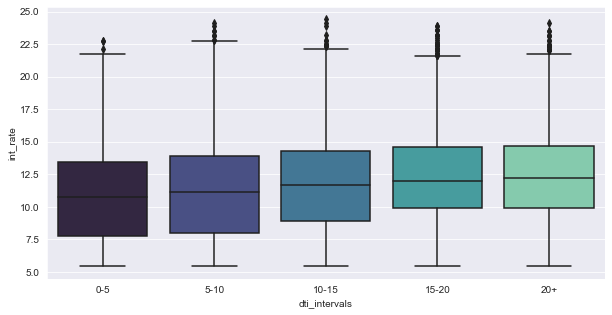

In [273]:
plotBoxPlotForNumericVarVsCategoricalVar('dti_intervals', 'int_rate', 10, 5)

we can see a very gradual trend between interest rate and DTI

<h3>Imformation Content</h3>
We will check the diffirence between highest and lowest charged-off proportion of different categories in variable

From this information, we can get to know wether for any given variable, Charged-off proprtion is significatly changes based on differnt categories or it stays similar for all categories.

If it remains similar, we can say that this variable doesn't have any influence over target variable and thus it can not be an impacting factor.



In [274]:
def getImformationContent(dataframe, variable):
    groupedDF = loanDF.groupby([variable, 'loan_status']).loan_status.count().unstack().reset_index()
    groupedDF['chargedOff_prop'] = groupedDF['Charged Off'] / (groupedDF['Charged Off'] + groupedDF['Fully Paid'])
    return round(groupedDF['chargedOff_prop'].max() - groupedDF['chargedOff_prop'].min(),2)

In [275]:
cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
        'purpose', 'addr_state', 'open_acc_intervals', 'pub_rec', 'total_acc_intervals', 'Year', 'Month',
        'int_rate_intervals', 'annual_inc_intervals', 'dti_intervals', 'loan_amnt_intervals', 
        'revol_util_intervals']
for col in cols:
    content = getImformationContent(loanDF, col)
    print(col + " - " + str(content))

term - 0.14
grade - 0.3
sub_grade - 0.48
emp_length - 0.09
home_ownership - 0.04
verification_status - 0.04
purpose - 0.17
addr_state - 0.56
open_acc_intervals - 0.29
pub_rec - 0.08
total_acc_intervals - 0.15
Year - 0.04
Month - 0.03
int_rate_intervals - 0.44
annual_inc_intervals - 0.11
dti_intervals - 0.04
loan_amnt_intervals - 0.12
revol_util_intervals - 0.1


From above information we can set and initial assumption that variables 'int_rate_intervals, 'addr_state', 'sub_grade', 'grade' would be highly influencing target variable.

<h3> Charged off perportions for different Variables </h3>

In [276]:
def calCulateAndPlotDefaultPer(variable, width, height):
    print("\n\nCharged-Off proportion of different category for:", variable)
    
    groupedDF = loanDF.groupby([variable, 'loan_status']).loan_status.count().unstack().reset_index()
    groupedDF['chargedOff_prop'] = groupedDF['Charged Off'] * 100 / (groupedDF['Charged Off'] + groupedDF['Fully Paid'])
        
    groupedDF.plot.bar(x = variable, y = 'chargedOff_prop', figsize=(width,height))
    
    plt.show()
    

In [277]:
def plotMosaic(dataFrame, variable, width = 10, height = 5):
    plt.rc("figure", figsize=(width,height))
    label = lambda x: ""
    mosaic(loanDF, [variable, 'loan_status'], labelizer=label)
    plt.show()

In [278]:
def printPerContributionOfAllCategores(dataframe, variable):
    totalRecord = dataframe.shape[0]
    valCount = dataframe[variable].value_counts().reset_index()
    valCount[variable] = valCount[variable].apply(lambda x: round((x/totalRecord) * 100, 2))
    print("Percent contribution of different category of", variable)
    print(valCount)

<h3>Loan Status</h3>

In [279]:
printPerContributionOfAllCategores(loanDF, 'loan_status')

Percent contribution of different category of loan_status
         index  loan_status
0   Fully Paid        85.54
1  Charged Off        14.46


<h4>purpose</h4>

Percent contribution of different category of purpose
                 index  purpose
0   debt_consolidation    46.71
1          credit_card    13.00
2                other    10.22
3     home_improvement     7.17
4       major_purchase     5.73
5       small_business     4.19
6                  car     4.06
7              wedding     2.47
8              medical     1.81
9               moving     1.56
10            vacation     1.03
11               house     0.93
12         educational     0.86
13    renewable_energy     0.27


Charged-Off proportion of different category for: purpose


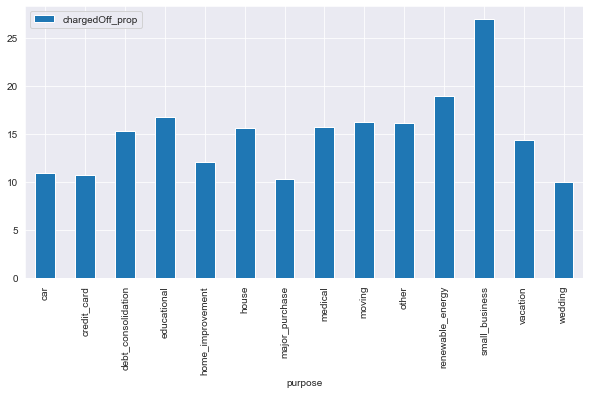

In [280]:
printPerContributionOfAllCategores(loanDF, 'purpose')
calCulateAndPlotDefaultPer('purpose', 10, 5)

<h4>term</h4>

In [281]:
printPerContributionOfAllCategores(loanDF, 'term')



Percent contribution of different category of term
        index   term
0   36 months  75.95
1   60 months  24.05




Charged-Off proportion of different category for: term


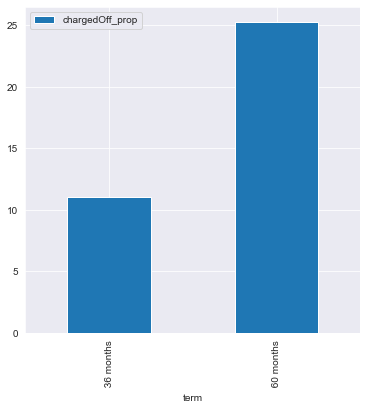

In [282]:
calCulateAndPlotDefaultPer('term', 6,6)

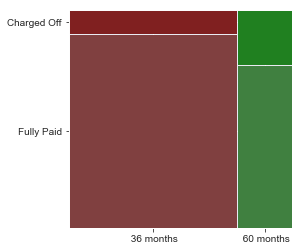

In [283]:
plotMosaic(loanDF, 'term', 4, 4)

<h4>Address State</h4>

Percent contribution of different category of addr_state
   index  addr_state
0     CA       17.93
1     NY        9.57
2     FL        7.24
3     TX        6.87
4     NJ        4.54
5     PA        3.89
6     IL        3.80
7     VA        3.53
8     GA        3.51
9     MA        3.36
10    OH        3.09
11    MD        2.61
12    AZ        2.22
13    WA        2.12
14    CO        1.97
15    NC        1.94
16    CT        1.82
17    MI        1.81
18    MO        1.76
19    MN        1.60
20    NV        1.25
21    SC        1.18
22    OR        1.17
23    WI        1.15
24    AL        1.14
25    LA        1.13
26    KY        0.84
27    OK        0.75
28    KS        0.66
29    UT        0.65
30    AR        0.62
31    DC        0.53
32    RI        0.51
33    NM        0.49
34    WV        0.46
35    HI        0.44
36    NH        0.42
37    DE        0.29
38    MT        0.22
39    WY        0.22
40    AK        0.20
41    SD        0.17
42    VT        0.14
43    MS        0.0

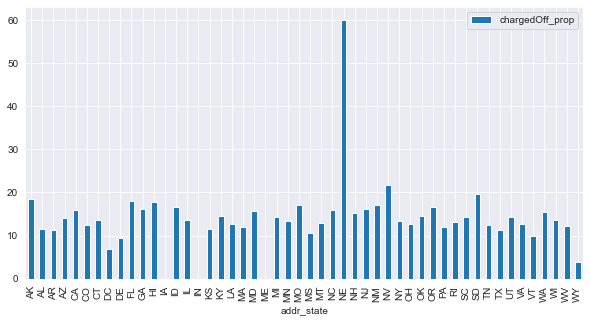

In [284]:
printPerContributionOfAllCategores(loanDF, 'addr_state')
calCulateAndPlotDefaultPer('addr_state',10,5)


In above chart, even though we can see a very significant proportion of charged-off for the state 'NE'

But we should also consider that the volume of records with 'NE' state is very less in comparision with other states

<h4>Grade and Sub-grade</h4>

Percent contribution of different category of grade
  index  grade
0     B  30.62
1     A  26.94
2     C  20.47
3     D  12.72
4     E   6.43
5     F   2.20
6     G   0.60


Charged-Off proportion of different category for: grade


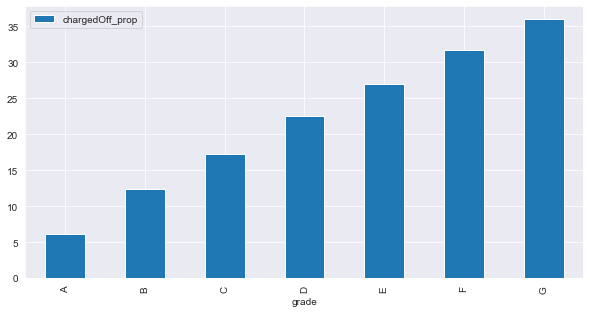

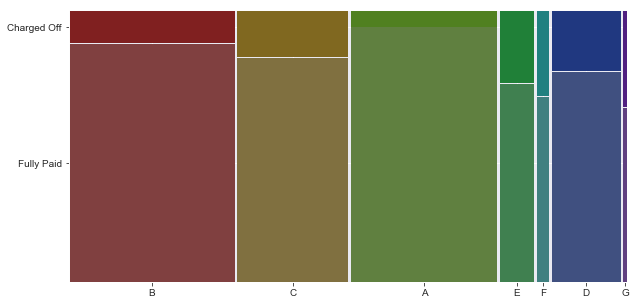

In [285]:
printPerContributionOfAllCategores(loanDF, 'grade')
calCulateAndPlotDefaultPer('grade',10,5)
plotMosaic(loanDF, 'grade', 10, 5)

From above chart, we can see 'Charged off' proportion is increasing with the grades.

So we should conisder this variable as a affecting factor.

Please note, we already know that this variable is directly related to the "interest rate" so that variable too becomes an affecting factor



Charged-Off proportion of different category for: sub_grade


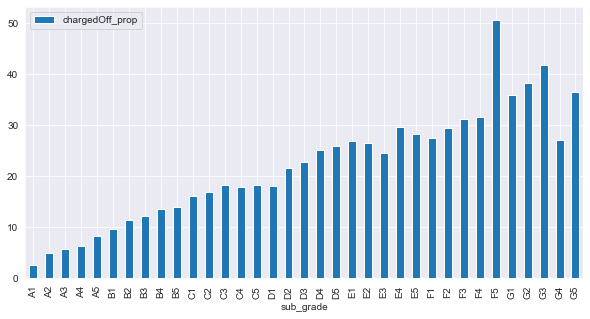

In [286]:
calCulateAndPlotDefaultPer('sub_grade',10,5)

<h4>Employment Lenght</h4>

Percent contribution of different category of emp_length
        index  emp_length
0   10+ years       20.99
1    < 1 year       11.92
2     2 years       11.27
3     3 years       10.62
4     4 years        8.73
5      1 year        8.42
6     5 years        8.36
7     6 years        5.65
8     7 years        4.47
9     8 years        3.66
10    9 years        3.16
11  Not Known        2.75


Charged-Off proportion of different category for: emp_length


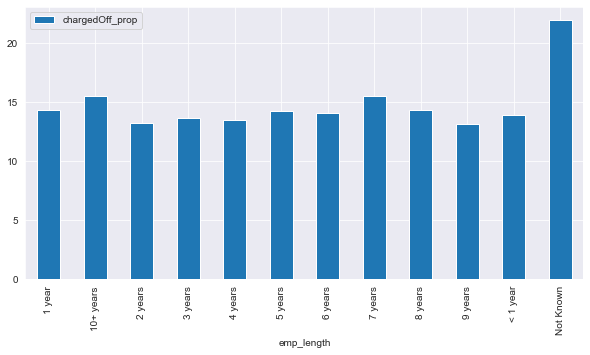

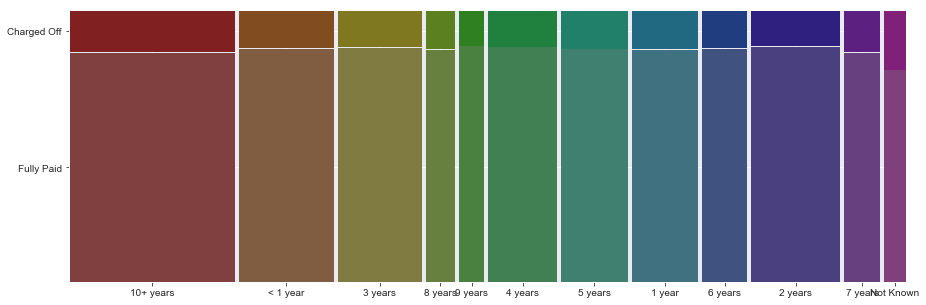

In [287]:
printPerContributionOfAllCategores(loanDF, 'emp_length')
calCulateAndPlotDefaultPer('emp_length',10,5)
plotMosaic(loanDF, 'emp_length', 15, 5)

Even though we cannot see any trends for all known 'length of employment' we should notice that those applications where this information wasn't provided have more tendency to go default

<h4>Month</h4>

Percent contribution of different category of Month
    index  Month
0      12  10.99
1      11  10.31
2      10   9.55
3       9   9.04
4       8   8.79
5       7   8.75
6       6   8.29
7       5   7.64
8       4   7.35
9       3   6.98
10      1   6.16
11      2   6.15


Charged-Off proportion of different category for: Month


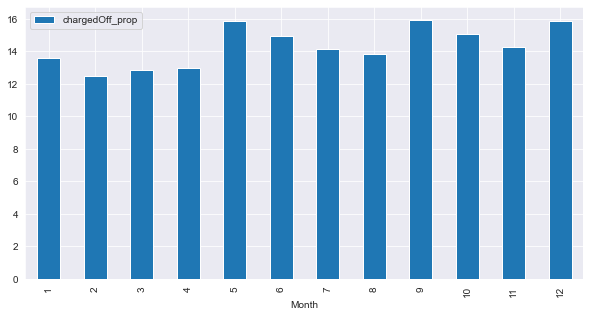

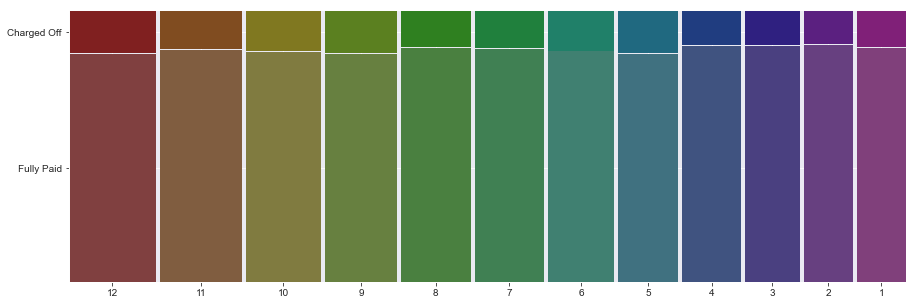

In [288]:
printPerContributionOfAllCategores(loanDF, 'Month')
calCulateAndPlotDefaultPer('Month',10,5)
plotMosaic(loanDF, 'Month', 15, 5)

<h4>Year</h4>

Percent contribution of different category of Year
   index   Year
0   2011  52.74
1   2010  30.30
2   2009  12.23
3   2008   4.10
4   2007   0.64


Charged-Off proportion of different category for: Year


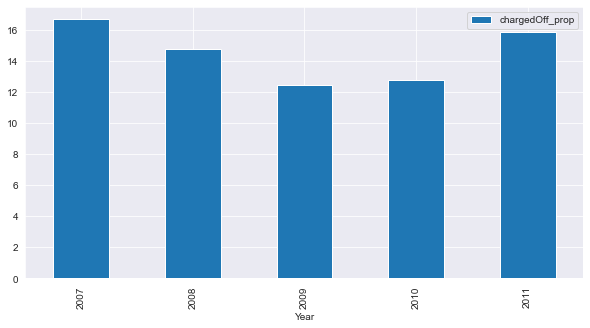

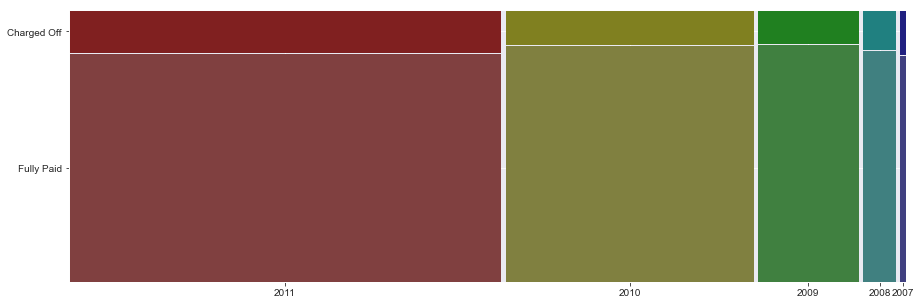

In [289]:
printPerContributionOfAllCategores(loanDF, 'Year')
calCulateAndPlotDefaultPer('Year',10,5)
plotMosaic(loanDF, 'Year', 15, 5)

Please note, from year 2009, number of loans gradted has been significantly increasing and with parallel, charged off proportion is also increasing. 

This trend isn't very pleasnt for any money lending agency.

<h4>public record bankruptcies</h4>

Percent contribution of different category of pub_rec_bankruptcies
       index  pub_rec_bankruptcies
0          0                 93.76
1          1                  4.42
2  Not Known                  1.81
3          2                  0.01


Charged-Off proportion of different category for: pub_rec_bankruptcies


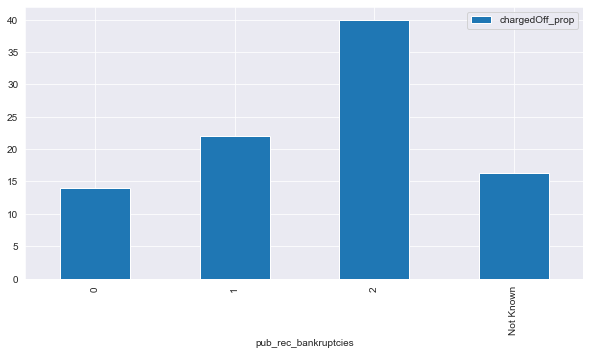

In [290]:
printPerContributionOfAllCategores(loanDF, 'pub_rec_bankruptcies')
calCulateAndPlotDefaultPer('pub_rec_bankruptcies',10,5)

<h4>Loan Amount</h4>

Percent contribution of different category of loan_amnt_intervals
     index  loan_amnt_intervals
0   5K-10K                34.91
1  10K-15K                20.78
2  2.5K-5K                19.04
3  15K-20K                11.50
4   0-2.5K                 7.01
5  20K-25K                 5.55
6     25K+                 1.20


Charged-Off proportion of different category for: loan_amnt_intervals


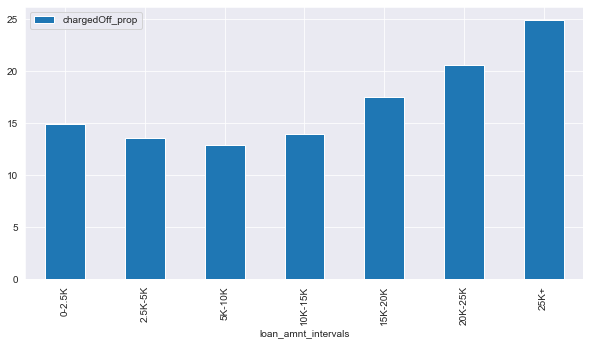

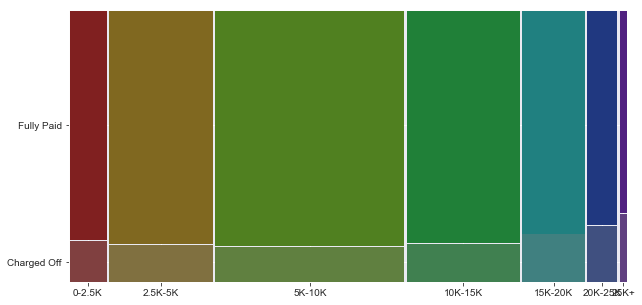

In [291]:
printPerContributionOfAllCategores(loanDF, 'loan_amnt_intervals')
calCulateAndPlotDefaultPer('loan_amnt_intervals',10,5)
plotMosaic(loanDF, 'loan_amnt_intervals', 10, 5)

we can clearly see from loan amount 10K onwards, higher the loan amount more tendency of it going to be default.

<h4>Interest Rate</h4>

Percent contribution of different category of int_rate_intervals
     index  int_rate_intervals
0  10-12.5               24.52
1  12.5-15               23.07
2   7.5-10               18.51
3    5-7.5               14.51
4  15-17.5               12.83
5  17.5-20                4.96
6  20-22.5                1.50
7    22.5+                0.10


Charged-Off proportion of different category for: int_rate_intervals


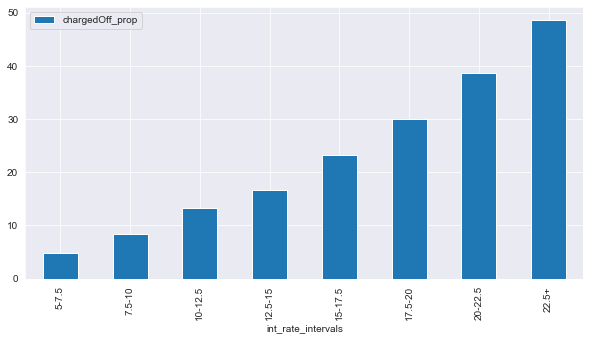

In [292]:
printPerContributionOfAllCategores(loanDF, 'int_rate_intervals')
calCulateAndPlotDefaultPer('int_rate_intervals',10,5)

As discussed while analysing 'Grade' variable, we know that this is an impacting factor

<h4>Annual Income</h4>

Percent contribution of different category of annual_inc_intervals
       index  annual_inc_intervals
0    25k-50k                 35.83
1    50k-75k                 31.60
2   75k-100k                 15.20
3    10k-25k                  6.84
4  100k-125k                  6.16
5  125k-150k                  2.76
6       150+                  1.35
7      0-10k                  0.26


Charged-Off proportion of different category for: annual_inc_intervals


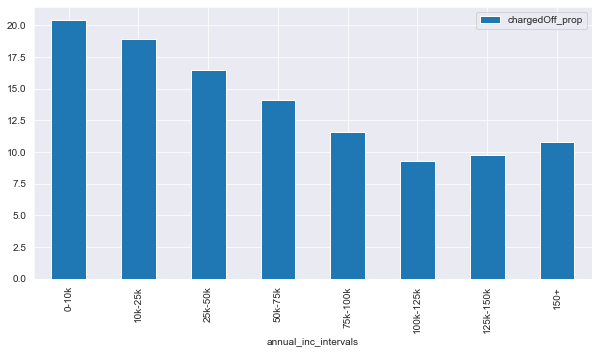

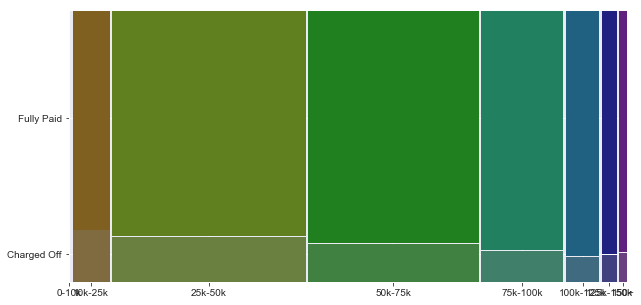

In [293]:
printPerContributionOfAllCategores(loanDF, 'annual_inc_intervals')
calCulateAndPlotDefaultPer('annual_inc_intervals',10,5)
plotMosaic(loanDF, 'annual_inc_intervals', 10, 5)

<h4>DTI</h4>

Percent contribution of different category of dti_intervals
   index  dti_intervals
0  10-15          25.08
1  15-20          22.79
2   5-10          20.28
3    20+          18.77
4    0-5          13.08


Charged-Off proportion of different category for: dti_intervals


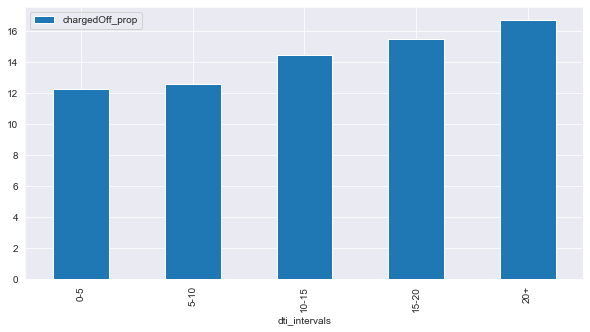

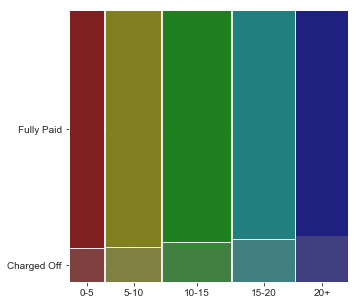

In [294]:
printPerContributionOfAllCategores(loanDF, 'dti_intervals')
calCulateAndPlotDefaultPer('dti_intervals',10,5)
plotMosaic(loanDF, 'dti_intervals', 5, 5)

For DTI We can see very gradual but strong trend.

<h4>Revolving line utilization rate</h4>

Percent contribution of different category of revol_util_intervals
   index  revol_util_intervals
0  40-60                 21.86
1  60-80                 20.56
2   0-20                 20.41
3  20-40                 20.34
4    80+                 16.83


Charged-Off proportion of different category for: revol_util_intervals


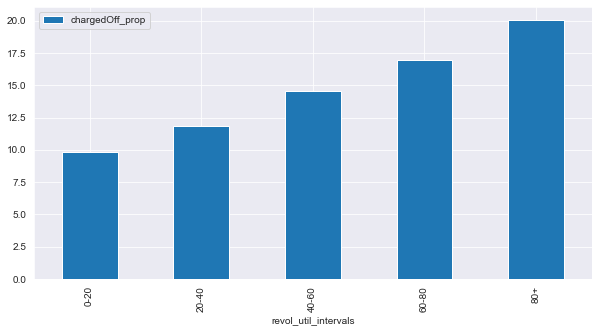

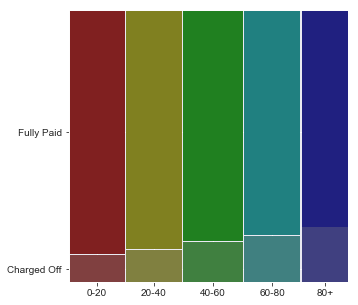

In [295]:
printPerContributionOfAllCategores(loanDF, 'revol_util_intervals')
calCulateAndPlotDefaultPer('revol_util_intervals',10,5)
plotMosaic(loanDF, 'revol_util_intervals', 5, 5)

Unlike DTI, tread with "Revolving Line Utilization Rate" is both significant and strong.

Higher the utilization more it is likely to go default.

<h3> Charged-off proportion of one variable in respect to other variable</h3>

In [296]:
def calCulateAndPlotDefaultPerWithHue(dataframe, variable, hueVar, width, height):
    print("\n\nCharged-Off proportion of different category for:" + variable + " in respect to: " + hueVar)
    
    plt.figure(figsize=(width,height))
    sns.set_style('darkgrid')
    sns.barplot(x=variable, y = 'loan_status',data=dataframe ,hue=hueVar,palette='mako')
    

In [297]:
loanDF['loan_status'] = loanDF['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1 )



Charged-Off proportion of different category for:term in respect to: purpose


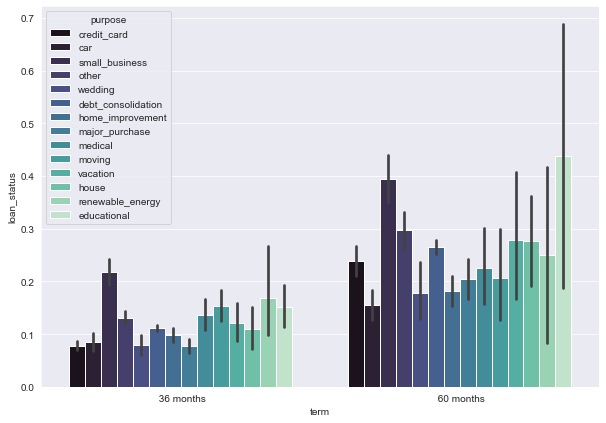

In [298]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'term', 'purpose', 10, 7)



Charged-Off proportion of different category for:int_rate_intervals in respect to: purpose


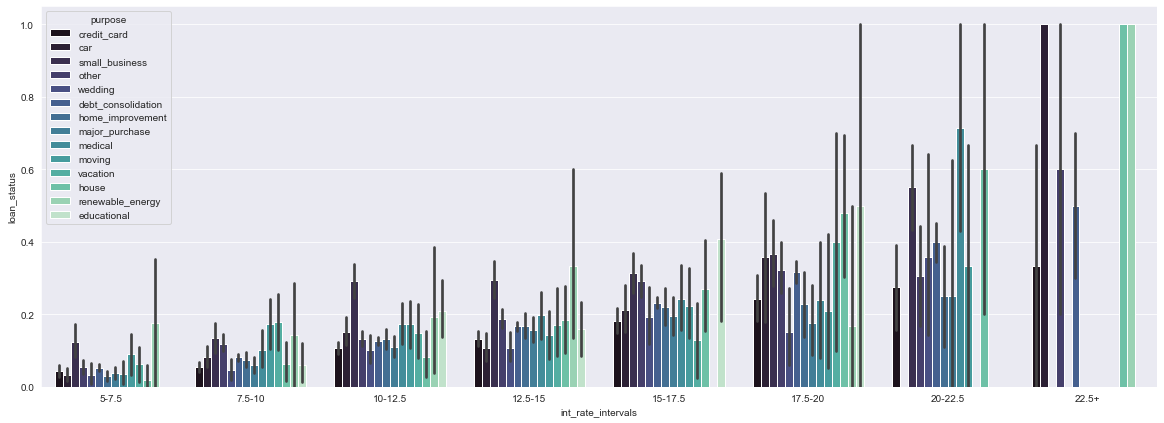

In [299]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'int_rate_intervals', 'purpose', 20, 7)



Charged-Off proportion of different category for:dti_intervals in respect to: purpose


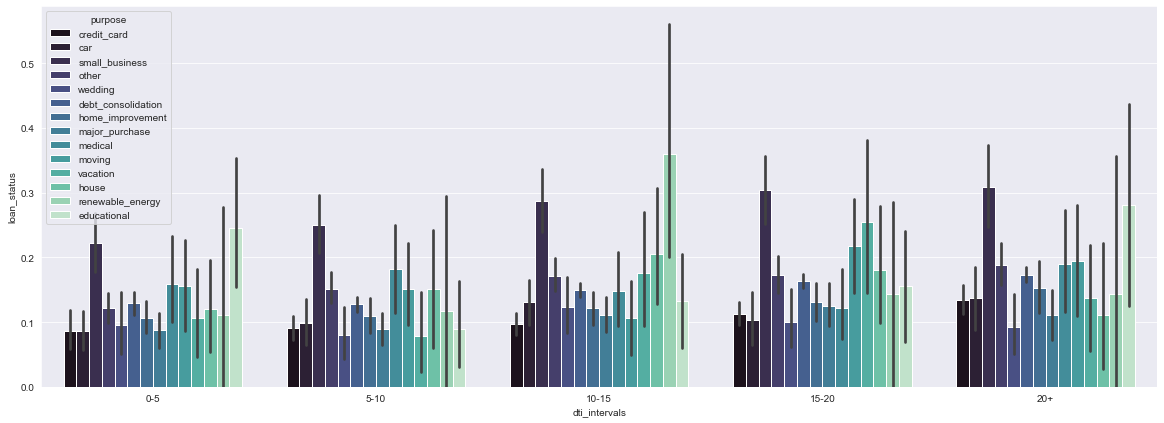

In [300]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'dti_intervals', 'purpose', 20, 7)



Charged-Off proportion of different category for:revol_util_intervals in respect to: purpose


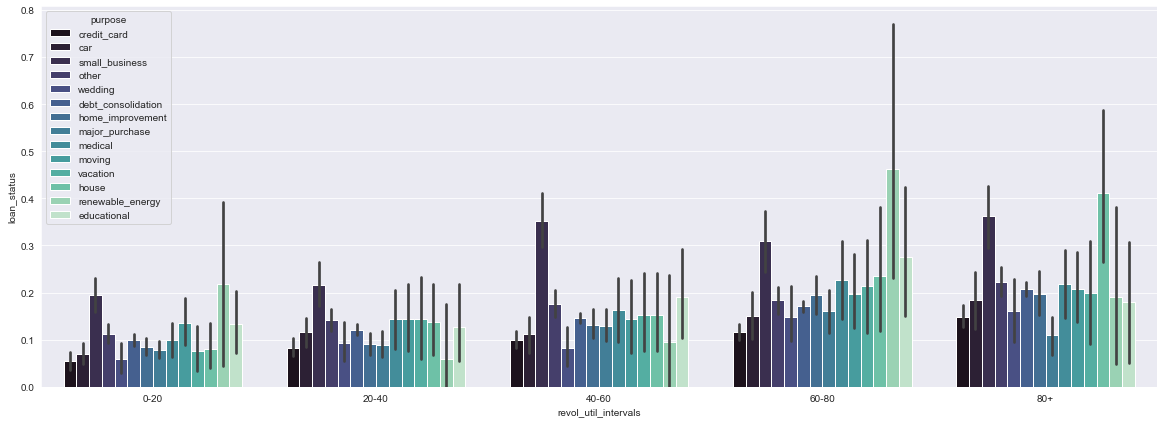

In [301]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'revol_util_intervals', 'purpose', 20, 7)



Charged-Off proportion of different category for:annual_inc_intervals in respect to: purpose


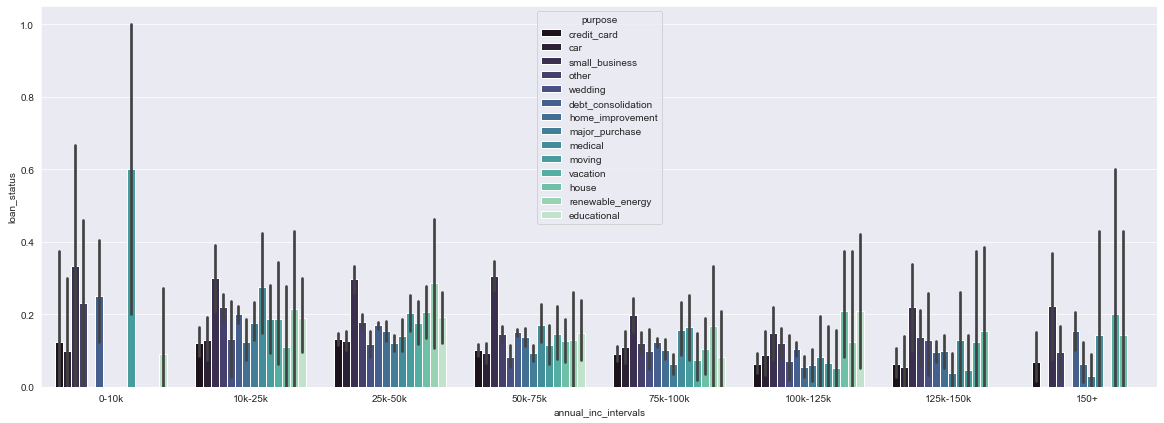

In [302]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'annual_inc_intervals', 'purpose', 20, 7)

Above charts of Chared proportion of 'Purpose' with resptect to other variables supports our initial analysis of "loan applied for  'Smalll Business' are more likely to go charged off"



Charged-Off proportion of different category for:term in respect to: Month


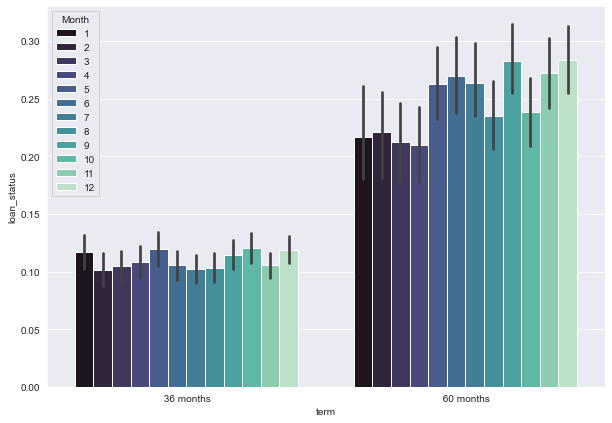

In [303]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'term', 'Month', 10, 7)



Charged-Off proportion of different category for:int_rate_intervals in respect to: Month


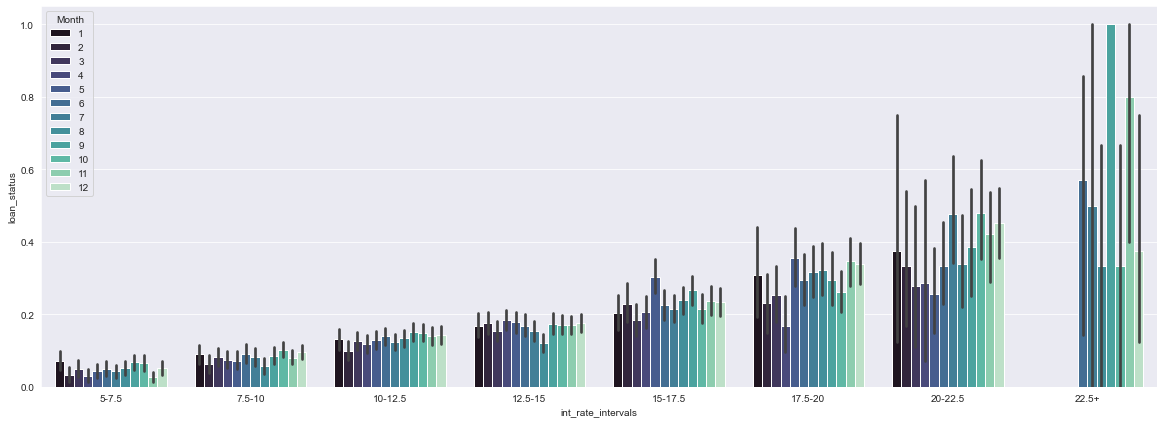

In [304]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'int_rate_intervals', 'Month', 20, 7)

From abouve chart, we can see that loans with 22.5+ interest rates (which has higher charged-off proportion) are approved in the second half of the years only



Charged-Off proportion of different category for:dti_intervals in respect to: Month


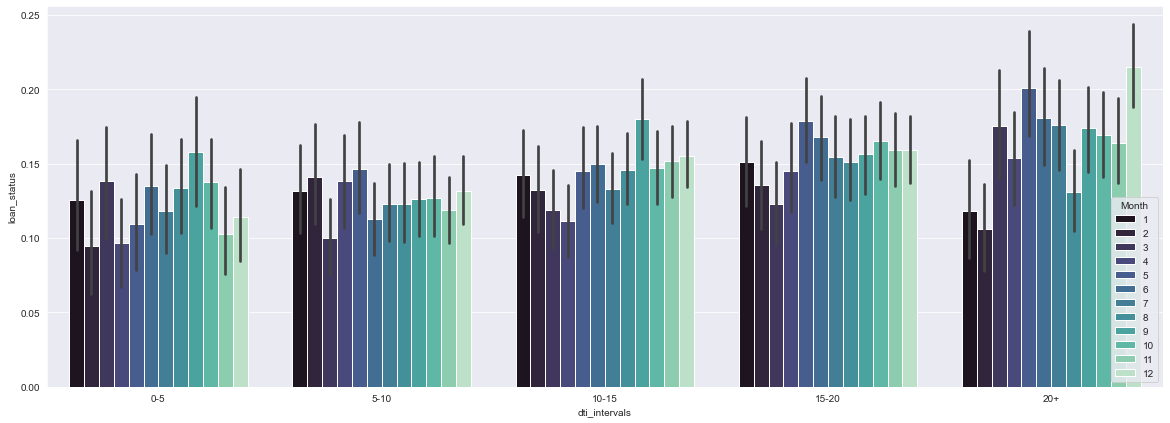

In [305]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'dti_intervals', 'Month', 20, 7)



Charged-Off proportion of different category for:revol_util_intervals in respect to: Month


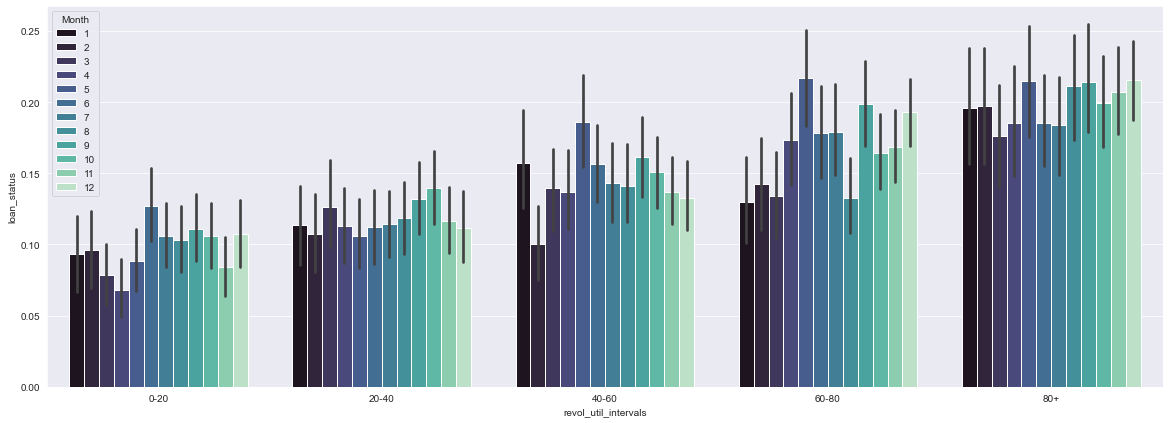

In [306]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'revol_util_intervals', 'Month', 20, 7)



Charged-Off proportion of different category for:annual_inc_intervals in respect to: Month


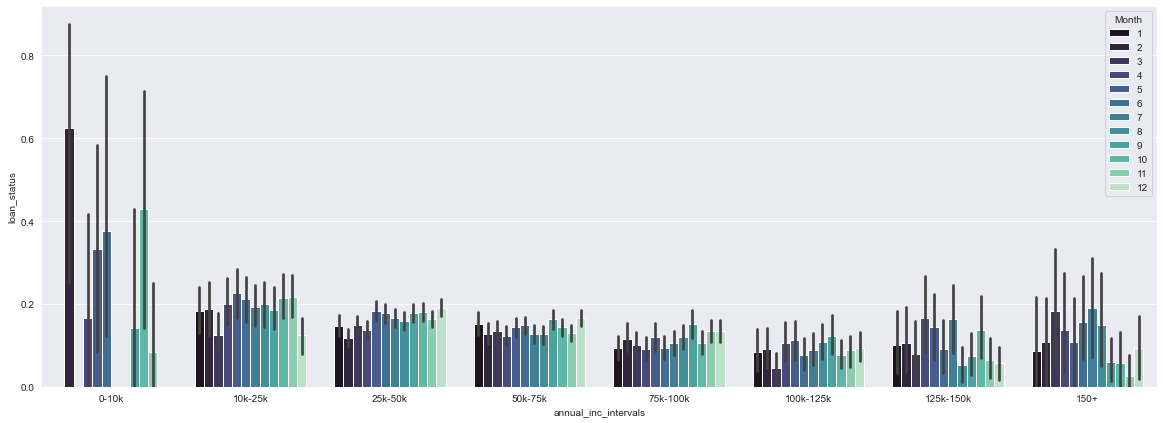

In [307]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'annual_inc_intervals', 'Month', 20, 7)

We could see, loans applied in second and third quater of the year is having slightly more tendency to go default

Also, we can see that loans with 22.5+ interest rates (which has higher charged-off proportion) are approved in the second half of the years only



Charged-Off proportion of different category for:term in respect to: grade


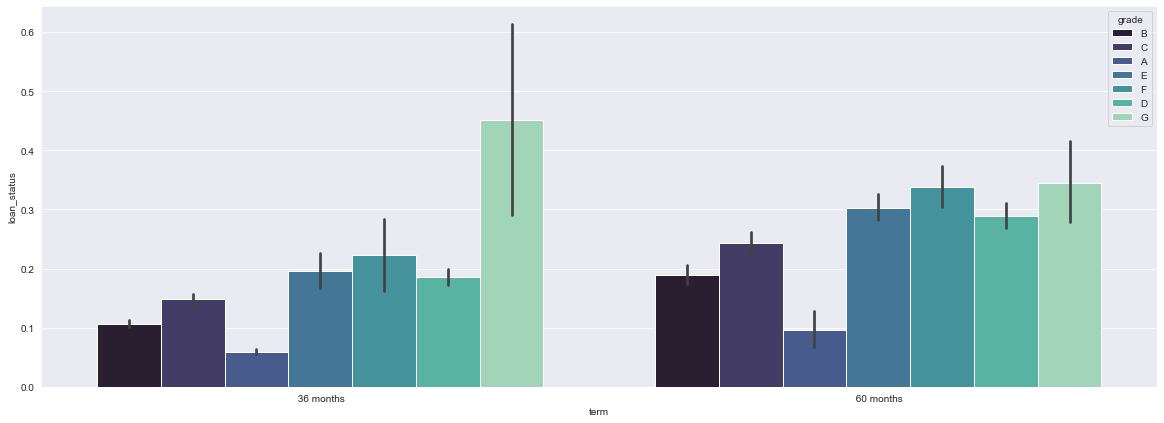

In [308]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'term', 'grade', 20, 7)



Charged-Off proportion of different category for:dti_intervals in respect to: grade


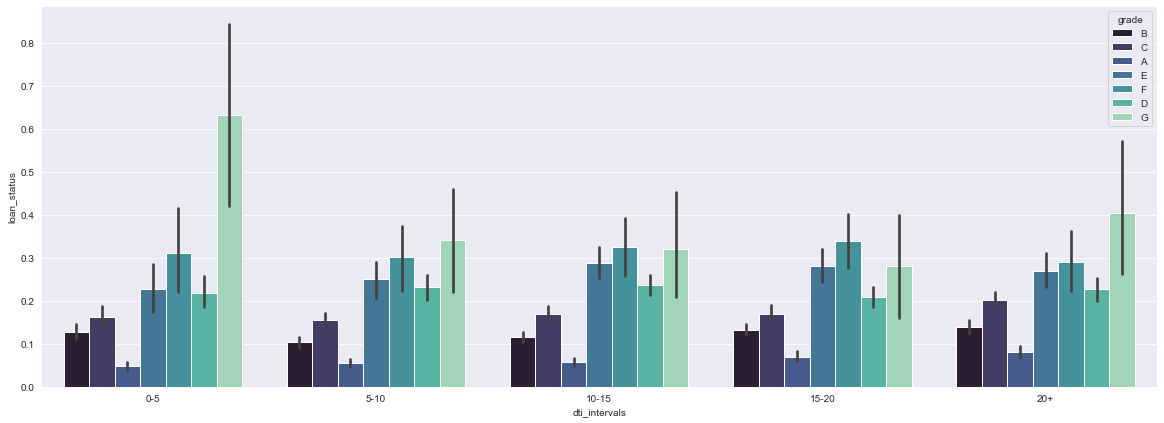

In [309]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'dti_intervals', 'grade', 20, 7)



Charged-Off proportion of different category for:revol_util_intervals in respect to: grade


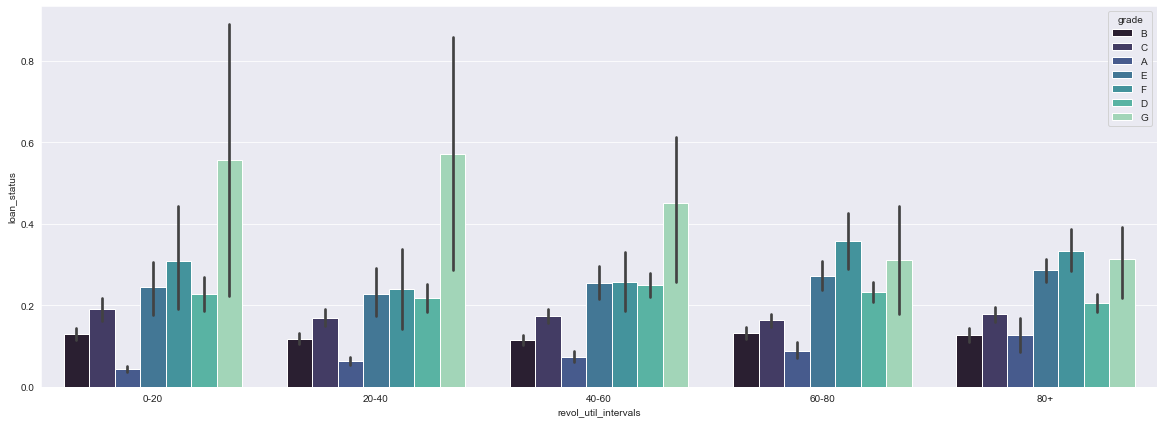

In [310]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'revol_util_intervals', 'grade', 20, 7)



Charged-Off proportion of different category for:annual_inc_intervals in respect to: grade


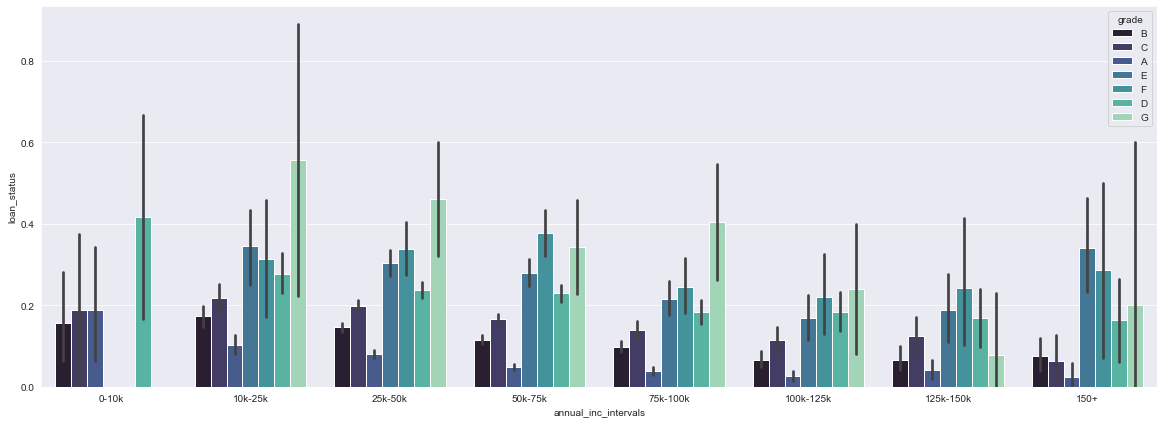

In [311]:
calCulateAndPlotDefaultPerWithHue(loanDF, 'annual_inc_intervals', 'grade', 20, 7)

Above charts of Charged off proportion of 'grade' with resptect to other variables supports our initial analysis of "as the grade goes high it is more likely to go charged off"

Apperantly, no hidden trends found from above analysis